In [39]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5)})

import matplotlib.pyplot as plt
import re
os.chdir('C:\\Users\\Tom Joseph\\Documents\\autoskout')

In [40]:
df = pd.read_csv('data.csv',sep=';')
 

### Data Cleaning 

In [3]:
# in the given data ctr column had non-float data types like 01.apr & 2.3.4.6
# so ctr is calculated from the given data as below 
df['ctr'] = df['detail_views']/df['search_views']

In [4]:
df['first_registration_year'].unique()

array([2013, 2015, 1998, 2003, 2014, 2017, 2008, 2018, 2016, 2010, 2007,
       2004, 2005, 2012, 2009, 2011, 1997, 2006, 1996, 1999, 2002, 2001,
       1954, 2000, 1994, 1966, 1988, 1981, 1989, 1991, 1993, 1984, 1987,
       1983, 1958, 2019, 1986, 1970, 1977, 1972, 1960, 1973, 1992, 1952,
       1975, 1995, 1980, 1959, 1968, 1990, 1976, 1978, 1979, 1974, 1965,
       1969, 1943, 1962, 1963, 1955, 1971, 1964, 1985, 1967, 1936, 1953,
       1947, 1956, 1949, 1931, 1932, 1941, 1957, 1961, 1982, 2106, 1935,
       1946, 1924, 1950, 1942, 1928, 1933, 1925, 1939, 2020, 1951],
      dtype=int64)

In [5]:
# We can see that the first_registration_year has values like 1924,1946,2106.
# Clearly these values are wrong
 

In [6]:
df = df.drop_duplicates(['article_id'])

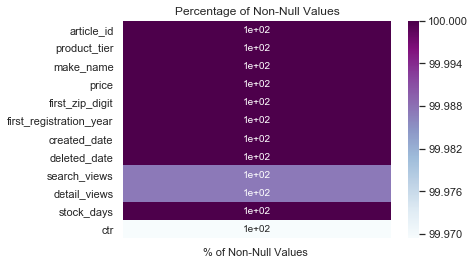

In [7]:
plt.title('Percentage of Non-Null Values')
sns.heatmap((100-(df.isnull().sum()/len(df))*100).to_frame().rename(columns={0:'% of Non-Null Values '}),annot=True,cmap='BuPu')
plt.show()

In [8]:
df = df.dropna() 

### Outlier detection 

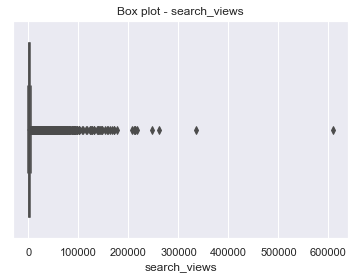

In [9]:
sns.boxplot(df['search_views'])
plt.title('Box plot - search_views')
plt.show()

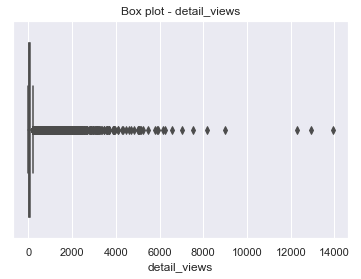

In [10]:
sns.boxplot(df['detail_views'])
plt.title('Box plot - detail_views')
plt.show()

### Exploratory Data Analysis

In [ ]:
print('Distribution of listings')
round(df['product_tier'].value_counts(normalize=True)*100,2)

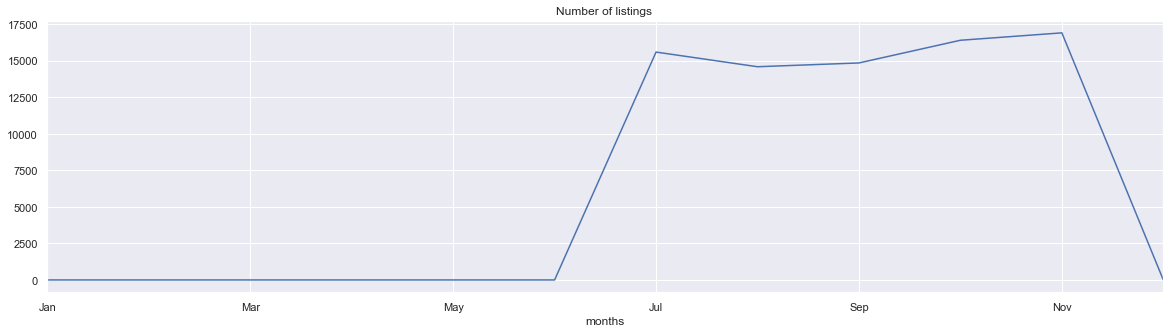

In [74]:
df['month'] = df['created_date'].apply(lambda x:x.split('.')[1])
months  = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep',\
 
 '10':'Oct','11':'Nov','12':'Dec'}
df['month'] = df['month'].apply(lambda x:months[x])
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['months'] = pd.Categorical(df['month'], categories=months, ordered=True)
df.groupby('months')['article_id'].count().plot()

plt.title('Number of listings ')
plt.show()

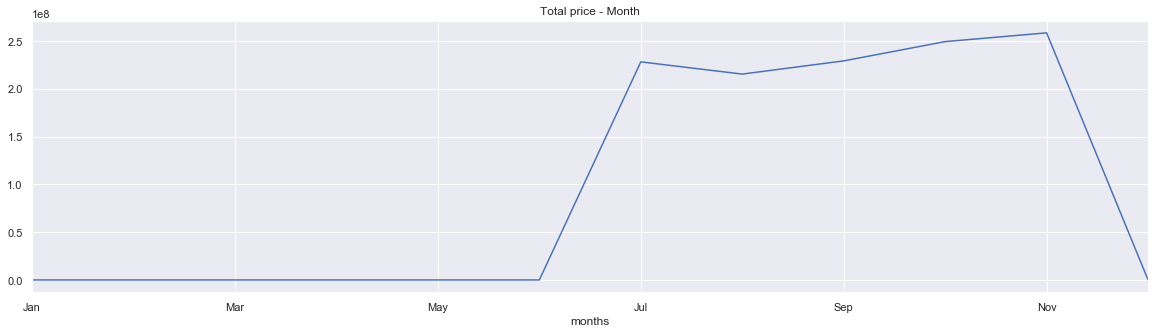

In [76]:
df.groupby('months')['price'].sum().plot()
plt.title('Total price - Month')
plt.show()


In [82]:
print('Total price across product tiers ')
price = df.groupby('product_tier')['price'].sum().reset_index().rename(columns={'price':'Sum of total price'}).sort_values('Sum of total price',ascending=False)
price['total in %']  = round(price['Sum of total price']/price['Sum of total price'].sum(),4)*100
price

Total price across product tiers 


,product_tier,Sum of total price,total in %
0,Basic,1138776612,96.50
2,Premium,33962247,2.88
1,Plus,7374973,0.62


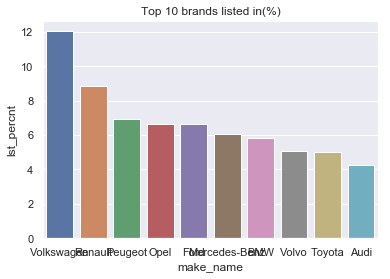

In [13]:
listing_count = df['make_name'].value_counts().iloc[:].to_frame().reset_index().rename(columns={'index':'make_name','make_name':'count'})
listing_count['lst_percnt'] = round(listing_count['count']/listing_count['count'].sum(),4)*100

sns.barplot(x='make_name',y='lst_percnt',data=listing_count.iloc[:10])
plt.title('Top 10 brands listed in(%)')
plt.show()

Median price across product_tiers


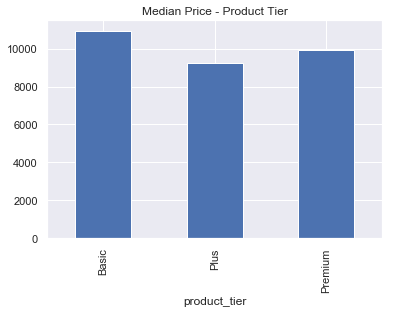

In [14]:
print('Median price across product_tiers')
df.groupby('product_tier')['price'].median().plot(kind='bar')
plt.title('Median Price - Product Tier')
plt.show()

In [15]:
print('Median CTR')
round(df['ctr'].median(),3)

Median CTR


0.038

### Impact of top products on listing performance

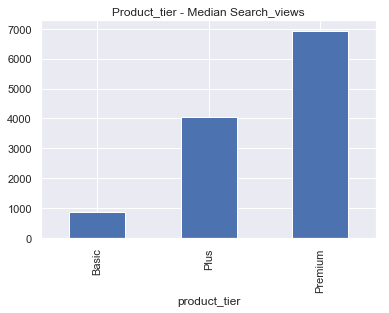

In [16]:
df.groupby(['product_tier'])['search_views'].median().plot(kind='bar')
plt.title('Product_tier - Median Search_views')
plt.show()

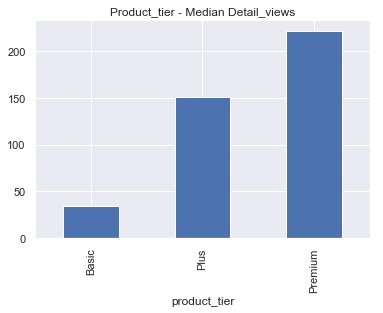

In [17]:
df.groupby(['product_tier'])['detail_views'].median().plot(kind='bar')
plt.title('Product_tier - Median Detail_views')
plt.show()

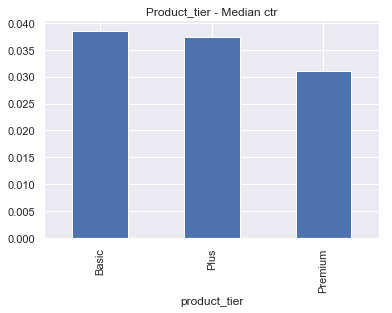

In [18]:
df.groupby(['product_tier'])['ctr'].median().plot(kind='bar')
plt.title('Product_tier - Median ctr')
plt.show()

#### from the above 3 charts we can find that, with Plus & Premium products - 
#### median search_views & detail_views increase significantly 
#### median ctr for Plus & Premium are lower than Basic. 
#### This is due to large volume of search_views not turning into clicks (detail_views)

In [19]:
# Now let's see how Product_tier works across different regions 

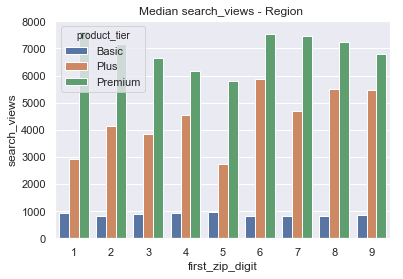

In [20]:
tier_region = df.groupby(['product_tier','first_zip_digit'])['search_views'].median().reset_index()
sns.barplot(hue='product_tier',y='search_views',x='first_zip_digit',data=tier_region)
plt.title('Median search_views - Region ')
plt.show()

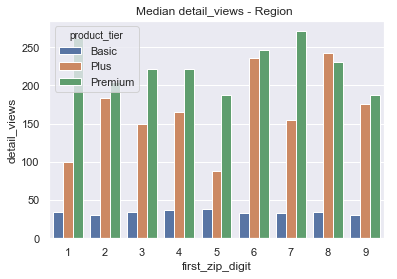

In [21]:
tier_region = df.groupby(['product_tier','first_zip_digit'])['detail_views'].median().reset_index()
sns.barplot(hue='product_tier',y='detail_views',x='first_zip_digit',data=tier_region)
plt.title('Median detail_views - Region ')
plt.show()

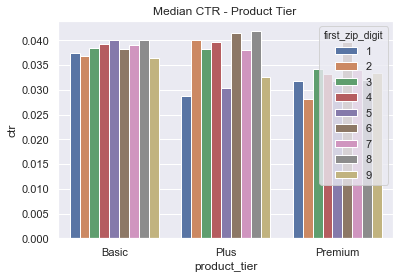

In [22]:
tier_region = df.groupby(['product_tier','first_zip_digit'])['ctr'].median().reset_index()
sns.barplot(x='product_tier',y='ctr',hue='first_zip_digit',data=tier_region)
plt.title('Median CTR - Product Tier ')
plt.show()

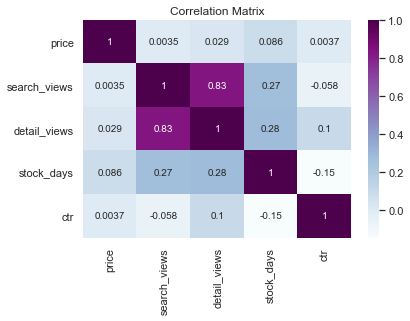

In [25]:
sns.heatmap(df.select_dtypes(exclude ='O').drop(columns=['article_id','first_zip_digit','first_registration_year']).corr(),\
            cmap='BuPu',annot=True)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# in the Correlation Matrix we can see that search_views and details_views are highly correlated(positively)
# stock days & ctr is negatively correlated,while stock_days & search_views & detail_views are positively correlated
# We can assume that as the listing ages,number of clicks decreases 
# so stock_days has an effect on listing performance 

In [27]:
make_tier = df.groupby(['make_name','product_tier']).agg({'stock_days':'median','ctr':'median'}).reset_index()

In [28]:
make_tier[make_tier['make_name']=='Volkswagen']

,make_name,product_tier,stock_days,ctr
177,Volkswagen,Basic,23.0,0.040930
178,Volkswagen,Plus,18.0,0.038771
179,Volkswagen,Premium,21.0,0.030554


In [83]:
gg = make_tier.groupby('make_name').count()['product_tier']
gg = gg.reset_index().rename(columns = {'product_tier':'distinct_listings'})
gg = gg[gg['distinct_listings']==3]   
  

In [30]:
make_tier = pd.merge(gg['make_name'],make_tier[['product_tier','stock_days','make_name']],on='make_name')

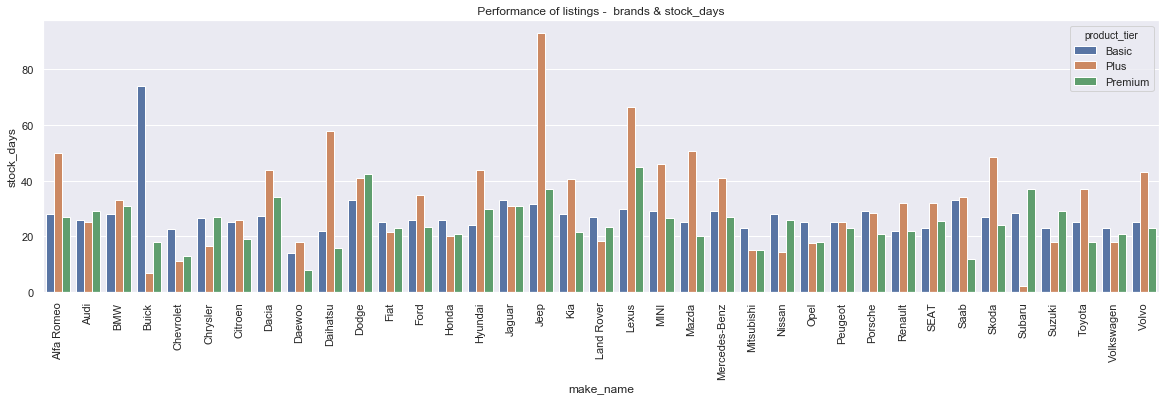

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='make_name',y='stock_days',hue = 'product_tier',data=make_tier)
plt.title(' Performance of listings -  brands & stock_days ')
plt.xticks(rotation=90)
plt.show()

In [32]:
# Stock days for 'Plus' is higher than Premium & Basic for most of the brands.
# This can be considered as anomaly because "Plus" & "Premium" listings are supposed to have less stock days.
# From above chart, we can find that 'how long does it take for a specific make to be sold/bought ?'
 


# Other metrics to be considered for the analyis
### I'd add a column - user_id to the dataset to calculate::
### -- user growth over the years
### -- daily active users,monthly active users, stickiness ratio
### -- retention, average order value